In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (feature_train, target_train), (feature_test, target_test)

11493376/11490434 [==============================] - 0s 0us/step


In [8]:
import matplotlib.pyplot as plt

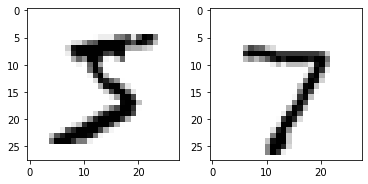

In [17]:
fig = plt.figure()
fig.add_subplot(1,2,1)
plt.imshow(x_train[0], cmap = plt.cm.binary)
#plt.show()
fig.add_subplot(1,2,2)
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()

In [20]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [21]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)

In [22]:
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [23]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

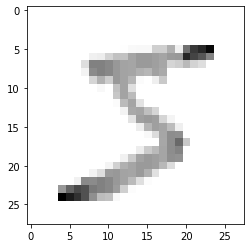

In [26]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

## Model building


### Model architecture

In [31]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Flatten

In [37]:
model = Sequential()

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(128, activation="relu"))

In [40]:
model.add(Dense(128, activation="relu"))

In [42]:
model.add(Dense(10, activation="softmax"))

### Model compile

In [46]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

Fit the model

In [75]:
model.fit(
    x_train, 
    y_train, 
    epochs=20
)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0070 - accuracy: 0.9977
Epoch 2/20
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0084 - accuracy: 0.9970
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0054 - accuracy: 0.9983
Epoch 4/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0081 - accuracy: 0.9975
Epoch 5/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0051 - accuracy: 0.9984
Epoch 6/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0068 - accuracy: 0.9980
Epoch 7/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0070 - accuracy: 0.9974
Epoch 8/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0067 - accuracy: 0.9978
Epoch 9/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0036 - accuracy: 0.9988
Epoch 10/20
60

## Evaluation

In [49]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.13265744510453104, 0.9758]

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  100480    
_________________________________________________________________
dense_3 (Dense)              multiple                  16512     
_________________________________________________________________
dense_4 (Dense)              multiple                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Save the model

In [61]:
from tensorflow.python.keras.models import load_model
model.save('model_file.model')

INFO:tensorflow:Assets written to: model_file.model/assets


In [62]:
new_model = load_model('model_file.model')

In [63]:
predictions = new_model.predict(x_test)

In [71]:
import numpy as np
np.argmax(predictions[1])

2

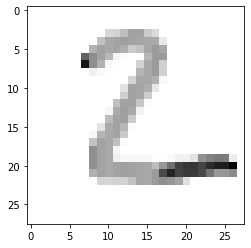

In [74]:
plt.imshow(x_test[1], cmap = plt.cm.binary)
plt.show()